In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

%matplotlib widget
import sys
sys.path.append("../../../")
import numpy as np
from src.utils.visualize import plot_coverage_set
from src.basis import MixedOrderBasisCircuitTemplate
from src.utils.custom_gates import ConversionGainGate

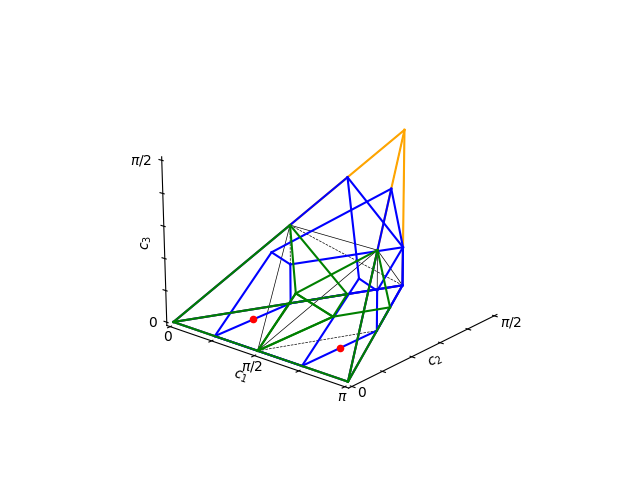

In [17]:
#coverage of an arbitrary gate 
# will load coverage polytope from file in template constructor or create it if it doesn't exist
base_gate = ConversionGainGate(0,0, np.pi/8, 3*np.pi/8, 1/2)
template = MixedOrderBasisCircuitTemplate(base_gates=[base_gate], chatty_build=0, bare_cost=True)
plot_coverage_set(template.coverage[:], save=0, filename=f"coverage_set_custom") 

In [2]:
iswap = np.pi/2, 0, 1, "iSwap", 3
sqiswap = np.pi/2, 0, 1/2, "sqiSwap", 3
cnot = np.pi/4, np.pi/4, 1, "CNOT", 3
sqcnot = np.pi/4, np.pi/4, 1/2, "sqCNOT", 6
b = 3*np.pi/8, np.pi/8, 1, "B", 2
sqb = 3*np.pi/8, np.pi/8, 1/2,  "sqB", 4
gate_list = [iswap, sqiswap, cnot, sqcnot, b, sqb]

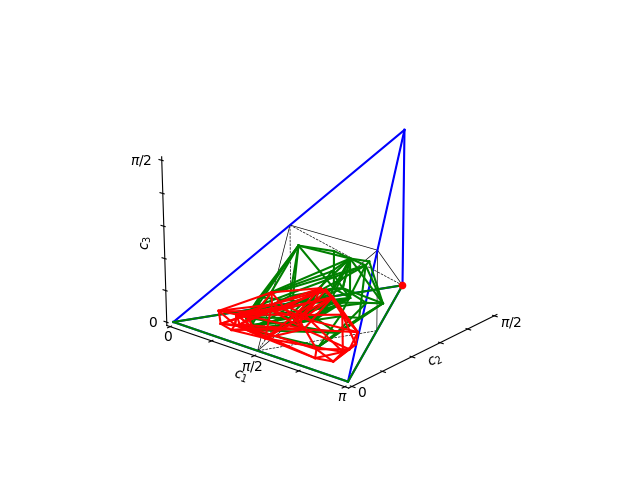

In [37]:
use_smush = 1
for gate_prop in gate_list[:1]:
    base_gate = ConversionGainGate(0,0, *gate_prop[:3])
    template = MixedOrderBasisCircuitTemplate(base_gates=[base_gate], chatty_build=0, bare_cost=True, use_smush_polytope=use_smush)
    fname = f"coverage_set_{gate_prop[3]}"
    if use_smush:
        fname += "_smush"

    poly_list = template.coverage
    plot_coverage_set(poly_list[:], save=1, filename=fname) 